# PART 1

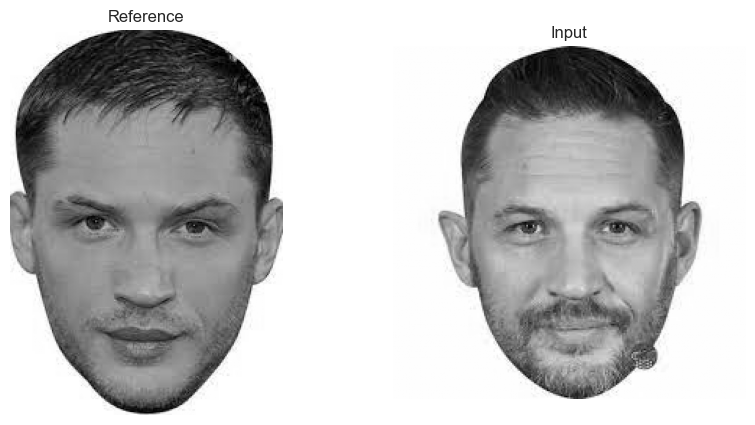

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyparsing import alphas


def to_grayscale(img):
    # اگر RGBA بود، کانال آلفا رو حذف کن
    if img.shape[-1] == 4:
        img = img[..., :3]

    # تبدیل به grayscale (luminosity method)
    gray = np.dot(img[..., :3], [0.299, 0.587, 0.114])
    return gray


# بارگذاری تصاویر
face_reference = plt.imread("resource/face_reference.jpg")
face_input = plt.imread("resource/face_input.jpg")

# تبدیل به grayscale
face_reference_gray = to_grayscale(face_reference)
face_input_gray = to_grayscale(face_input)

# نمایش کنار هم
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(face_reference_gray, cmap="gray")
axes[0].set_title("Reference")
axes[0].axis('off')

axes[1].imshow(face_input_gray, cmap="gray")
axes[1].set_title("Input")
axes[1].axis('off')

plt.show()


# PART 2

In [35]:
def resize_image(img, n_shape):
    h, w = img.shape[:2]
    new_h, new_w = n_shape
    row_idx = np.linspace(0, h - 1, new_h).astype(int)
    col_idx = np.linspace(0, w - 1, new_w).astype(int)
    if img.ndim == 2:
        return img[row_idx[:, None], col_idx]
    else:
        return img[row_idx[:, None], col_idx, :]


new_shape = (min(face_reference_gray.shape[0], face_input_gray.shape[0]),
             min(face_reference_gray.shape[1], face_input_gray.shape[1]))

face_reference_resized = resize_image(face_reference_gray, new_shape)
face_input_resized = resize_image(face_input_gray, new_shape)
print(f"shape size reference : {face_reference_resized.shape}")
print(f"shape size input : {face_input_resized.shape}")

diff = face_reference_resized - face_input_resized
print(np.max(np.abs(diff)))  # بیشترین اختلاف پیکسل
print(np.mean(np.abs(diff)))  # میانگین اختلاف پیکسل
print(np.min(np.abs(diff)))  # کمترین اختلاف پیکسل

MAE = np.mean(np.abs(diff))
MSE = np.mean(diff ** 2)

print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)

shape size reference : (225, 189)
shape size input : (225, 189)
254.99999999999997
56.21753248677247
0.0
Mean Absolute Error (MAE): 56.21753248677247
Mean Squared Error (MSE): 7843.017005404795


# PART 3

MAE: 56.21753248677247
MSE: 7843.017005404795
Result: Face Not Matched


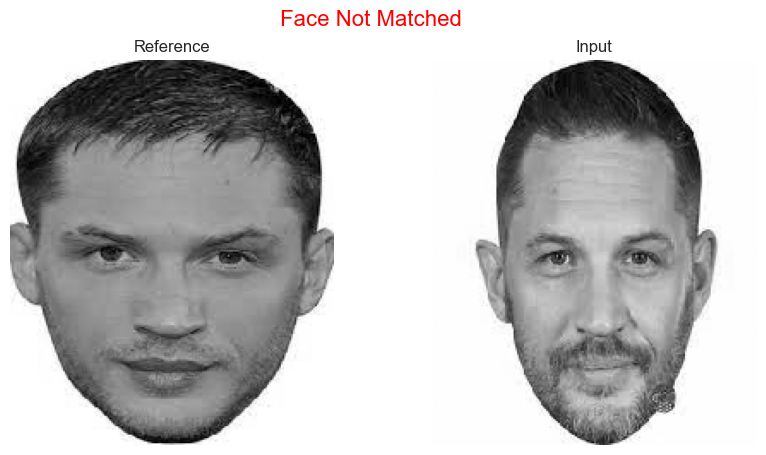

In [36]:
threshold = 0.05  # مثال: اگر MAE یا MSE کمتر از 0.05 باشد مشابه
if MAE < threshold or MSE < threshold:
    result_text = "Face Matched"
else:
    result_text = "Face Not Matched"

print("MAE:", MAE)
print("MSE:", MSE)
print("Result:", result_text)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(face_reference_resized, cmap="gray")
axes[0].set_title("Reference")
axes[0].axis('off')

axes[1].imshow(face_input_resized, cmap="gray")
axes[1].set_title("Input")
axes[1].axis('off')

plt.suptitle(result_text, fontsize=16, color='red')
plt.show()


Comparative Analysis Results:
             Image          MSE
0  face_input1.png  7843.017005


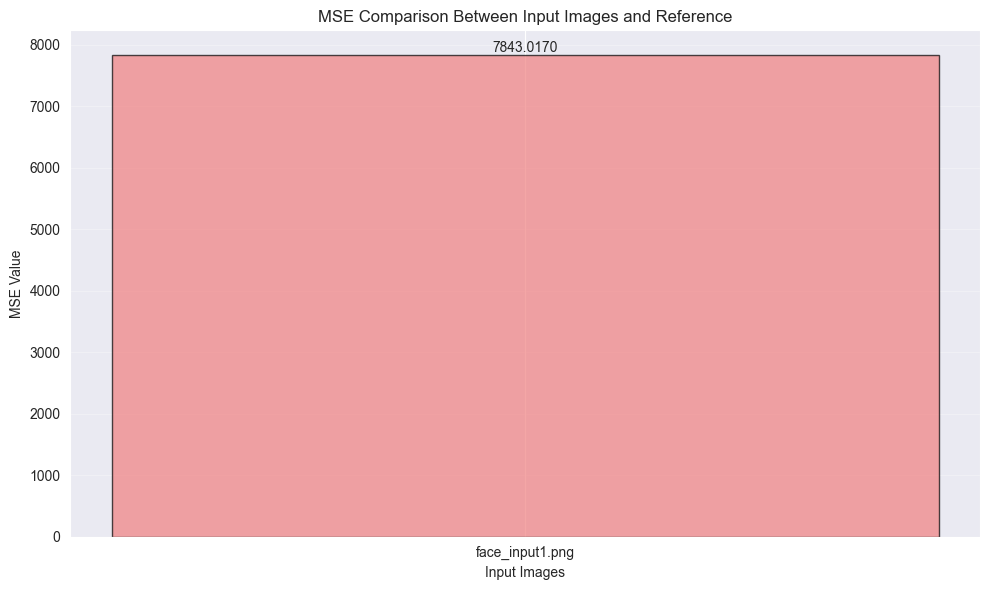

In [37]:
# PART 4: Save results in DataFrame (Comparative Analysis)

# ایجاد DataFrame با نتایج
df_comparison = pd.DataFrame({
    "Image": ["face_input1.png"],  # نام تصاویر
    "MSE": [MSE]  # مقدار MSE که قبلاً محاسبه شده
})

# اگر چندین تصویر دارید، به این صورت اضافه کنید:
# df_comparison = pd.DataFrame({
#     "Image": ["img1", "img2", "img3", "img4", "img5"],
#     "MSE": [MSE1, MSE2, MSE3, MSE4, MSE5]
# })

print("Comparative Analysis Results:")
print(df_comparison)

# نمودار میلهای MSE
plt.figure(figsize=(10, 6))
bars = plt.bar(df_comparison["Image"], df_comparison["MSE"],
               color='lightcoral', edgecolor='black', alpha=0.7)

# اضافه کردن مقادیر روی نمودار
for bar, value in zip(bars, df_comparison["MSE"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Input Images')
plt.ylabel('MSE Value')
plt.title('MSE Comparison Between Input Images and Reference')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()